In [1]:
import pandas as pd
import pyodbc
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plot

In [2]:
sales_conn = sqlite3.connect("../week 2/go_sales.sqlite")

order_details  = pd.read_sql("SELECT * FROM order_details", sales_conn)
returned_item = pd.read_sql("SELECT * FROM returned_item", sales_conn)
product = pd.read_sql("SELECT * FROM product", sales_conn)
product_type = pd.read_sql("SELECT * FROM product_type", sales_conn)
product_line = pd.read_sql("SELECT * FROM product_line", sales_conn)

order_returned = pd.merge(order_details, returned_item, on='ORDER_DETAIL_CODE')
order_returned_product = pd.merge(order_returned, product, on='PRODUCT_NUMBER')
order_returned_product_type = pd.merge(order_returned_product, product_type, on='PRODUCT_TYPE_CODE')
merged = pd.merge(order_returned_product_type, product_line, on='PRODUCT_LINE_CODE', suffixes=('_left', '_right'))

merged

,ORDER_DETAIL_CODE,ORDER_NUMBER,PRODUCT_NUMBER,QUANTITY,UNIT_COST,UNIT_PRICE,UNIT_SALE_PRICE,TRIAL879,RETURN_CODE,RETURN_DATE,...,PRODUCT_IMAGE,LANGUAGE,PRODUCT_NAME,DESCRIPTION,TRIAL888_y,PRODUCT_LINE_CODE,PRODUCT_TYPE_EN,TRIAL888_left,PRODUCT_LINE_EN,TRIAL888_right
0,100146,8465,15,16,504.54,756.82,593.5,T,1975,9-8-2021 18:45:17,...,P15CE1TN2.jpg,EN,Star Gazer 6,Massive cabin tent has ample room for six peop...,T,1,Tents,T,Camping Equipment,T
1,100149,9116,16,64,1.02,2.05,2.05,T,1976,6-7-2021 13:34:59,...,P16CE1TN2.jpg,EN,Star Peg,A single tent peg made of heavy-duty plated st...,T,1,Tents,T,Camping Equipment,T
2,100199,9113,30,22,6.78,13.57,13.57,T,1979,6-7-2021 07:19:36,...,P30CE1LT5.jpg,EN,Firefly Lite,Lightweight flashlight made from aircraft alum...,T,1,Lanterns,T,Camping Equipment,T
3,100250,9254,43,52,126.51,189.77,189.77,T,2298,14-12-2021 11:28:50,...,P42ME2RP6.jpg,EN,Husky Rope 60,11 mm diameter standard rope. Length: 60 m. W...,T,2,Rope,T,Mountaineering Equipment,T
4,100641,9269,111,6,81.87,180.13,180.13,T,2301,19-12-2021 04:10:53,...,P111GE5PT20.jpg,EN,Blue Steel Max Putter,Putter head is composed from a single piece of...,T,5,Putters,T,Golf Equipment,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,99739,9250,15,16,554.59,831.88,626.94,T,1974,9-11-2020 13:32:27,...,P15CE1TN2.jpg,EN,Star Gazer 6,Massive cabin tent has ample room for six peop...,T,1,Tents,T,Camping Equipment,T
702,99746,8444,17,34,64.36,90.09,90.09,T,1977,18-8-2020 19:48:51,...,P17CE1SB3.jpg,EN,Hibernator Lite,The Hibernator Lite is the perfect summer slee...,T,1,Sleeping Bags,T,Camping Equipment,T
703,99807,8440,33,70,19.62,29.44,29.44,T,1980,22-11-2020 13:33:29,...,P33CE1LT5.jpg,EN,Firefly 4,"Made of solid plastic construction, adjustable...",T,1,Lanterns,T,Camping Equipment,T
704,99810,9251,34,54,32.02,51.24,51.24,T,1981,17-10-2020 19:48:21,...,P34CE1LT5.jpg,EN,Firefly Extreme,The Firefly Extreme is under 15 cm long yet pr...,T,1,Lanterns,T,Camping Equipment,T


In [3]:
df = merged.loc[:, ['PRODUCT_LINE_EN', 'QUANTITY', 'UNIT_PRICE', 'UNIT_SALE_PRICE', 'RETURN_REASON_CODE']]
df

#afhankelijke variabele: RETURN_REASON_CODE onafhankelijke variabelen: PRODUCT_NUMBER, QUANTITY, UNIT_PRICE, UNIT_SALE_PRICE, 

,PRODUCT_LINE_EN,QUANTITY,UNIT_PRICE,UNIT_SALE_PRICE,RETURN_REASON_CODE
0,Camping Equipment,16,756.82,593.5,4
1,Camping Equipment,64,2.05,2.05,5
2,Camping Equipment,22,13.57,13.57,4
3,Mountaineering Equipment,52,189.77,189.77,1
4,Golf Equipment,6,180.13,180.13,4
...,...,...,...,...,...
701,Camping Equipment,16,831.88,626.94,1
702,Camping Equipment,34,90.09,90.09,1
703,Camping Equipment,70,29.44,29.44,1
704,Camping Equipment,54,51.24,51.24,3


In [4]:
dummies_df = pd.get_dummies(df.loc[:, ['PRODUCT_LINE_EN']])
dummies_df

,PRODUCT_LINE_EN_Camping Equipment,PRODUCT_LINE_EN_Golf Equipment,PRODUCT_LINE_EN_Mountaineering Equipment,PRODUCT_LINE_EN_Outdoor Protection,PRODUCT_LINE_EN_Personal Accessories
0,True,False,False,False,False
1,True,False,False,False,False
2,True,False,False,False,False
3,False,False,True,False,False
4,False,True,False,False,False
...,...,...,...,...,...
701,True,False,False,False,False
702,True,False,False,False,False
703,True,False,False,False,False
704,True,False,False,False,False


In [5]:
df = pd.concat([df, dummies_df], axis = 1)
df = df.drop(['PRODUCT_LINE_EN'], axis = 1)
df = df.loc[:, ['PRODUCT_LINE_EN_Camping Equipment', 'PRODUCT_LINE_EN_Golf Equipment', 'PRODUCT_LINE_EN_Mountaineering Equipment', 'PRODUCT_LINE_EN_Outdoor Protection', 'PRODUCT_LINE_EN_Personal Accessories', 'QUANTITY', 'UNIT_PRICE', 'UNIT_SALE_PRICE', 'RETURN_REASON_CODE']]
df

,PRODUCT_LINE_EN_Camping Equipment,PRODUCT_LINE_EN_Golf Equipment,PRODUCT_LINE_EN_Mountaineering Equipment,PRODUCT_LINE_EN_Outdoor Protection,PRODUCT_LINE_EN_Personal Accessories,QUANTITY,UNIT_PRICE,UNIT_SALE_PRICE,RETURN_REASON_CODE
0,True,False,False,False,False,16,756.82,593.5,4
1,True,False,False,False,False,64,2.05,2.05,5
2,True,False,False,False,False,22,13.57,13.57,4
3,False,False,True,False,False,52,189.77,189.77,1
4,False,True,False,False,False,6,180.13,180.13,4
...,...,...,...,...,...,...,...,...,...
701,True,False,False,False,False,16,831.88,626.94,1
702,True,False,False,False,False,34,90.09,90.09,1
703,True,False,False,False,False,70,29.44,29.44,1
704,True,False,False,False,False,54,51.24,51.24,3


In [6]:
x = df.drop('RETURN_REASON_CODE', axis = 1)
y = df.loc[:, ['RETURN_REASON_CODE']]
x

,PRODUCT_LINE_EN_Camping Equipment,PRODUCT_LINE_EN_Golf Equipment,PRODUCT_LINE_EN_Mountaineering Equipment,PRODUCT_LINE_EN_Outdoor Protection,PRODUCT_LINE_EN_Personal Accessories,QUANTITY,UNIT_PRICE,UNIT_SALE_PRICE
0,True,False,False,False,False,16,756.82,593.5
1,True,False,False,False,False,64,2.05,2.05
2,True,False,False,False,False,22,13.57,13.57
3,False,False,True,False,False,52,189.77,189.77
4,False,True,False,False,False,6,180.13,180.13
...,...,...,...,...,...,...,...,...
701,True,False,False,False,False,16,831.88,626.94
702,True,False,False,False,False,34,90.09,90.09
703,True,False,False,False,False,70,29.44,29.44
704,True,False,False,False,False,54,51.24,51.24


In [7]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.15,
    random_state=42
)

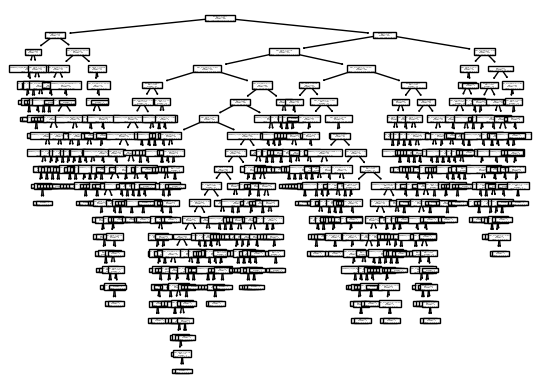

In [8]:
dtree = DecisionTreeClassifier(max_depth = 2)
dtree = dtree.fit(x_train, y_train)
tree.plot_tree(dtree, feature_names = x.columns)
plot.show()

In [9]:
predict_df = pd.DataFrame(dtree.predict(x_test))
predict_df = predict_df.rename(columns={0:'Predicted_reason'})
results_frame = pd.concat([y_test.reset_index()['RETURN_REASON_CODE'], predict_df], axis = 1)
results_frame


,RETURN_REASON_CODE,Predicted_reason
0,1,1
1,1,3
2,1,4
3,1,1
4,1,2
...,...,...
101,2,5
102,4,3
103,1,5
104,5,1


C:\Users\itsum\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


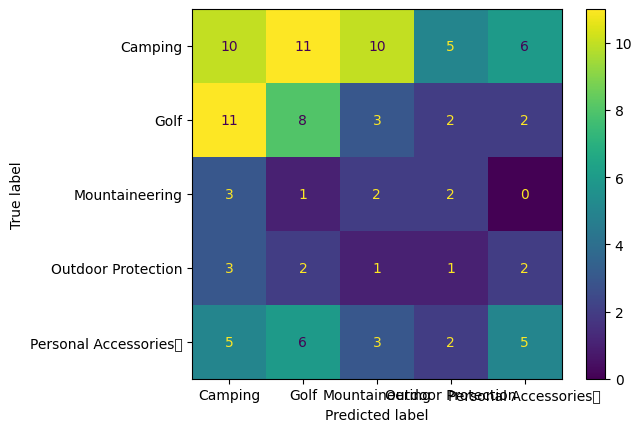

In [10]:
confusion_matrix = metrics.confusion_matrix(results_frame['RETURN_REASON_CODE'], results_frame['Predicted_reason'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=["Camping", "Golf", "Mountaineering", "Outdoor Protection", "Personal Accessories	"])

cm_display.plot()
plot.show()

In [11]:
metrics.accuracy_score(results_frame['RETURN_REASON_CODE'], results_frame['Predicted_reason'])

0.24528301886792453